<a href="https://colab.research.google.com/github/cb-kali/DL_and_ML/blob/main/Stock_Market_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final Project**

**Registration I'd: SIRSS2134**

**Name: Chetan Bansal**

**"Stock Market Prediction Project using LSTM and Decision Tree"**

Project description: •Artificial intelligence (AI) to play an integral role in our day to day life applications whether it be home environment applications like Alexa or financial applications like trading, it is a development towards a new era of technology. This project comprises of an application of AI on financial data, known as algorithmic trading.
•Automated trading systems involves the use of complex AI systems to make extremely fast trading decisions like buy, hold, or sell. It involves high frequency trading or HFT to make millions of trade in a day.
•Machine learning is a subset of AI and generally provides solutions which learn from experience without being explicitly programmed.
•In simple words, just the machine learning models are selected and fed with data the model then automatically adjusts its parameters and improves its outcome. 

The stock market prediction project is created using LSTM, Decision Tree and Keras to predict the future 30 days stock price.

Members:

1)Mrinmoy Dutta

2) Mihir Vatsa

3)Shubham Salokhe

4) Gaurav Bhogale

5) Chetan Bansal

In [ ]:
#importing all the basic libraries reqired for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pandas_datareader as pdr
%matplotlib
%matplotlib inline

Using matplotlib backend: agg


In [ ]:
#reading the dataset required for our project
df = pdr.get_data_tiingo('AAPL', api_key='007e99e97e91f5fb71f5469e91e5c845f22f4db7')

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
df = pd.read_csv('AAPL.csv')

In [ ]:
#displaying top 5 rows
df.head(10)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-10-17 00:00:00+00:00,117.55,117.84,116.78,117.33,23624896,27.555810,27.623791,27.375309,27.504238,94499584,0.0,1.0
1,AAPL,2016-10-18 00:00:00+00:00,117.47,118.21,117.45,118.18,24553478,27.537057,27.710526,27.532368,27.703493,98213912,0.0,1.0
2,AAPL,2016-10-19 00:00:00+00:00,117.12,117.76,113.80,117.25,20034594,27.455011,27.605038,26.676744,27.485485,80138376,0.0,1.0
3,AAPL,2016-10-20 00:00:00+00:00,117.06,117.38,116.33,116.86,24125801,27.440945,27.515959,27.269821,27.394062,96503204,0.0,1.0
4,AAPL,2016-10-21 00:00:00+00:00,116.60,116.91,116.28,116.81,23192665,27.333113,27.405783,27.258100,27.382341,92770660,0.0,1.0
5,AAPL,2016-10-24 00:00:00+00:00,117.65,117.74,117.00,117.10,23538673,27.579252,27.600350,27.426880,27.450322,94154692,0.0,1.0
6,AAPL,2016-10-25 00:00:00+00:00,118.25,118.36,117.31,117.95,48128970,27.719903,27.745689,27.499550,27.649577,192515880,0.0,1.0
7,AAPL,2016-10-26 00:00:00+00:00,115.59,115.70,113.31,114.31,66134219,27.096351,27.122137,26.561879,26.796297,264536876,0.0,1.0
8,AAPL,2016-10-27 00:00:00+00:00,114.48,115.86,114.10,115.39,34562045,26.836148,27.159644,26.747069,27.049468,138248180,0.0,1.0
9,AAPL,2016-10-28 00:00:00+00:00,113.72,115.21,113.45,113.87,37861662,26.657990,27.007273,26.594697,26.693153,151446648,0.0,1.0


In [ ]:
df.shape

(1258, 14)

In [ ]:
#displaying the names of columns
df.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [ ]:
#displaying if there are any blanks or na values
df.isna().any()

symbol         False
date           False
close          False
high           False
low            False
open           False
volume         False
adjClose       False
adjHigh        False
adjLow         False
adjOpen        False
adjVolume      False
divCash        False
splitFactor    False
dtype: bool

In [ ]:
#displaying basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


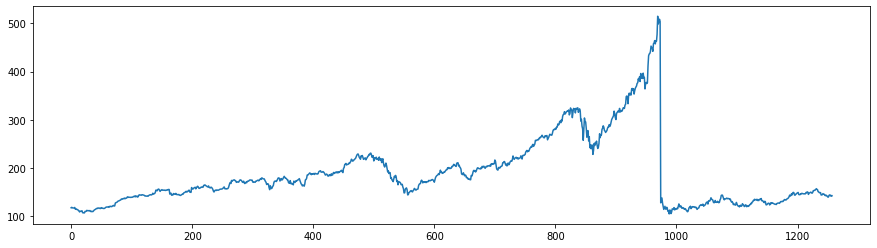

In [ ]:
#plotting a graph
df['open'].plot(figsize=(15,4))

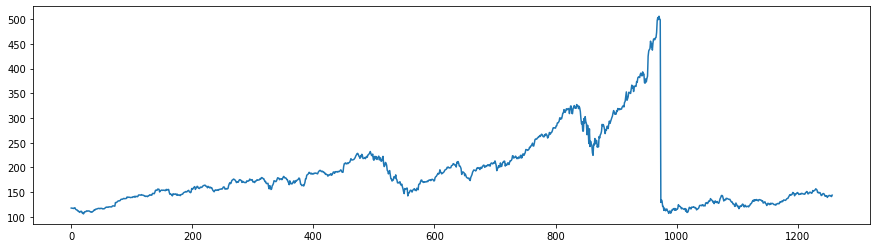

In [ ]:
df['close'].plot(figsize=(15,4))

In [ ]:
#7 day rolling mean
df.rolling(7).mean().head(15)

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,117.385714,117.742857,116.421429,117.354286,2.674273e+07,27.517299,27.601019,27.291253,27.509931,1.069709e+08,0.000000,1.0
7,117.105714,117.437143,115.925714,116.922857,3.281549e+07,27.451662,27.529354,27.175049,27.408797,1.312619e+08,0.000000,1.0
8,116.678571,117.101429,115.447143,116.524286,3.424528e+07,27.351532,27.450657,27.062863,27.315365,1.369811e+08,0.000000,1.0
9,116.192857,116.737143,115.397143,116.041429,3.679200e+07,27.237672,27.365262,27.051142,27.202174,1.471680e+08,0.000000,1.0


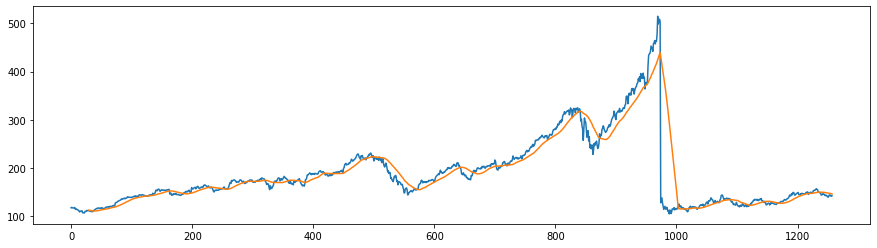

In [ ]:
df['open'].plot(figsize=(15,4))
df.rolling(window=30).mean()['close'].plot()

In [ ]:
df1 = df.reset_index()['close']
df1[1250:]

1250    141.11
1251    142.00
1252    143.29
1253    142.90
1254    142.81
1255    141.51
1256    140.91
1257    143.76
Name: close, dtype: float64

In [ ]:
#transforming features to set range - Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
df1 = sc.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.02957191],
       [0.0293721 ],
       [0.02849793],
       ...,
       [0.08941506],
       [0.08791648],
       [0.09503472]])

In [ ]:
df1.shape

(1258, 1)

In [ ]:
#splitting dataset into train and test
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [ ]:
training_size, test_size

(817, 441)

In [ ]:
import numpy
#converting array of values into dataset matrix
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#reshaping the data into X = t, t+1, t+2, t+3 and Y = t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [ ]:
#reshaping the input which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
#creating the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 300ms/step - loss: 0.0157 - val_loss: 0.0309
Epoch 2/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0039 - val_loss: 0.0263
Epoch 3/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0021 - val_loss: 0.0208
Epoch 4/100
12/12 [==============================] - 2s 190ms/step - loss: 8.7732e-04 - val_loss: 0.0223
Epoch 5/100
12/12 [==============================] - 2s 191ms/step - loss: 5.5404e-04 - val_loss: 0.0273
Epoch 6/100
12/12 [==============================] - 2s 189ms/step - loss: 4.8933e-04 - val_loss: 0.0255
Epoch 7/100
12/12 [==============================] - 2s 189ms/step - loss: 4.4586e-04 - val_loss: 0.0245
Epoch 8/100
12/12 [==============================] - 2s 190ms/step - loss: 4.3413e-04 - val_loss: 0.0260
Epoch 9/100
12/12 [==============================] - 2s 187ms/step - loss: 4.1590e-04 - val_loss: 0.0268
Epoch 10/100
12/12 [==============================] - 2s 190ms/step

In [ ]:
#prediction and checking performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

192.9699777358331

In [ ]:
math.sqrt(mean_squared_error(ytest, test_predict))

219.12794715426818

In [ ]:
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

In [ ]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict) + (look_back*2) + 1:len(df1)-1, :] = test_predict

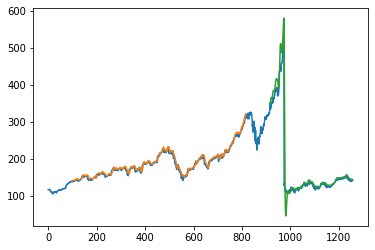

In [ ]:
plt.plot(sc.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

441

In [ ]:
x_input = test_data[340:].reshape(1, -1)
x_input.shape

(1, 101)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i<30):

  if(len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape(1, n_steps, 1)
    yhat = model.predict(x_input, verbose = 0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(yhat.tolist())
    i = i + 1
  else:
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i = i + 1

print(lst_output)

0 day input [0.05292472 0.05279984 0.04887857 0.04720516 0.04638094 0.04832909
 0.04453269 0.05040212 0.05042709 0.0525251  0.05349918 0.0509516
 0.05404865 0.06186623 0.05976822 0.06104201 0.06513812 0.06181627
 0.06641191 0.07060792 0.06990859 0.06918427 0.06843499 0.07260602
 0.07647735 0.07805085 0.07882512 0.08554373 0.09068885 0.0970578
 0.09373595 0.09840651 0.09688296 0.09973026 0.10849693 0.10682352
 0.10160348 0.09176283 0.10100405 0.09913083 0.1026275  0.10702333
 0.10809731 0.10255258 0.09808182 0.09973026 0.10027973 0.09943054
 0.10402618 0.10300215 0.10327689 0.10097907 0.10085419 0.09963035
 0.10027973 0.10784754 0.10837205 0.11341725 0.11109446 0.10152855
 0.10237774 0.10609921 0.1098956  0.10967081 0.1065238  0.10447575
 0.10712323 0.11841251 0.11519057 0.11688896 0.11973625 0.12135971
 0.12732904 0.12338279 0.12078525 0.10804736 0.10949598 0.10592437
 0.10819721 0.10759778 0.10077926 0.09298666 0.0942105  0.10025476
 0.10270243 0.10292722 0.0990559  0.09041411 0.09271

In [ ]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [ ]:
len(df1)

1258

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)

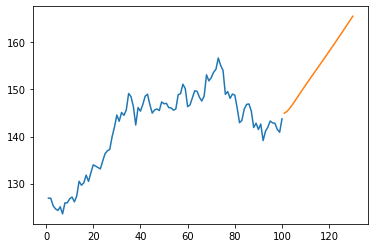

In [ ]:
plt.plot(day_new, sc.inverse_transform(df1[1158:]))
plt.plot(day_pred, sc.inverse_transform(lst_output))

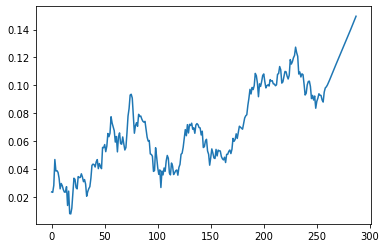

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

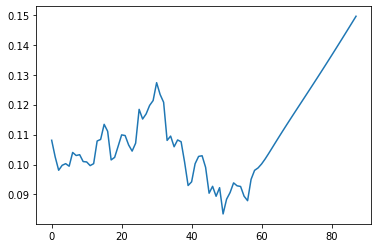

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
df4 = df[['close']]
df4.head(5)

,close
0,117.55
1,117.47
2,117.12
3,117.06
4,116.60


In [ ]:
future_days1 = 30
df4['prediction'] = df4[['close']].shift(-future_days1)
df4.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,close,prediction
0,117.55,111.46
1,117.47,110.52
2,117.12,109.49
3,117.06,109.90
4,116.60,109.11


In [ ]:
X = np.array(df4.drop(['prediction'],1))[:-future_days1]
print(X)

[[117.55]
 [117.47]
 [117.12]
 ...
 [153.12]
 [151.83]
 [152.51]]


In [ ]:
y = np.array(df4['prediction'])[:-future_days1]
print(y)

[111.46 110.52 109.49 ... 141.51 140.91 143.76]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
x_future = df4.drop(['prediction'], 1)[:-future_days1]
x_future = x_future.tail(future_days1)
x_future = np.array(x_future)
x_future

array([[146.8 ],
       [148.56],
       [148.99],
       [146.77],
       [144.98],
       [145.64],
       [145.86],
       [145.52],
       [147.36],
       [146.95],
       [147.06],
       [146.14],
       [146.09],
       [145.6 ],
       [145.86],
       [148.89],
       [149.1 ],
       [151.12],
       [150.19],
       [146.36],
       [146.7 ],
       [148.19],
       [149.71],
       [149.62],
       [148.36],
       [147.54],
       [148.6 ],
       [153.12],
       [151.83],
       [152.51]])

In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

[153.65  154.3   152.09  155.11  154.07  148.97  146.83  148.12  149.03
 145.175 145.175 142.94  143.43  145.85  146.83  146.92  145.37  141.91
 142.83  141.5   142.65  170.93  141.11  141.11  143.29  145.16  142.81
 174.81  172.5   144.02 ]

[162.06530126 163.19010062 163.46490955 162.04612855 160.90215648
 161.32395623 161.46455615 161.24726537 162.42319197 162.16116484
 162.2314648  161.64350151 161.61154698 161.29839261 161.46455615
 163.40100049 163.53520951 164.8261724  164.2318182  161.78410142
 162.00139221 162.95363712 163.92505474 163.86753659 163.06228251
 162.53822826 163.21566424 166.10435348 165.27992669 165.71450825]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


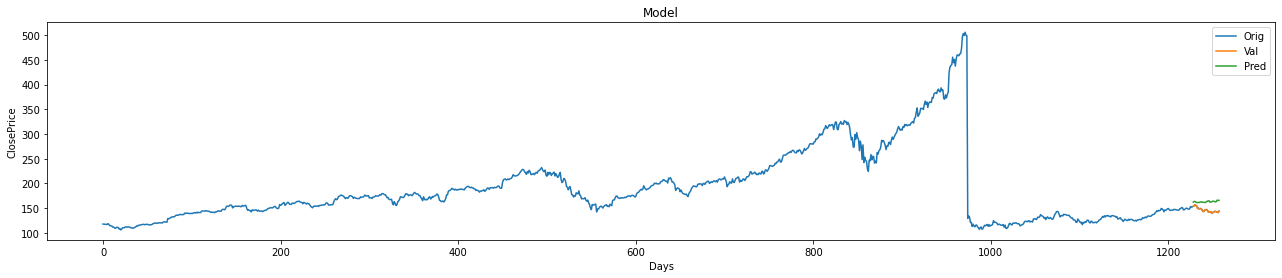

In [ ]:
predictions = lr_prediction

valid = df4[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize = (22,4))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('ClosePrice')
plt.plot(df4['close'])
plt.plot(valid[['close', 'predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()